In [3]:
%load_ext autoreload
%autoreload 2
from modules import read_and_write
from modules import polyakov
from modules import utility
from modules import fourier_surface
from modules import globals
import os
import glob

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
folders = utility.list_all_folders(globals.data_path,"60-60-86-6")

../data/output-measure-surface/su4-60-60-86-6/beta-10.80-twist-1-60-60-86-6 , index: 0
../data/output-measure-surface/su4-60-60-86-6/beta-10.80-twist-2-60-60-86-6 , index: 1
../data/output-measure-surface/su4-60-60-86-6/beta-10.82-twist-1-60-60-86-6 , index: 2
../data/output-measure-surface/su4-60-60-86-6/beta-10.82-twist-2-60-60-86-6 , index: 3
../data/output-measure-surface/su4-60-60-86-6/beta-10.83-twist-1-60-60-86-6 , index: 4
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-1-60-60-86-6 , index: 5
../data/output-measure-surface/su4-60-60-86-6/beta-10.85-twist-2-60-60-86-6 , index: 6
../data/output-measure-surface/su4-60-60-86-6/beta-11.5-twist-1-60-60-86-6 , index: 7
../data/output-measure-surface/su4-60-60-86-6/beta-11.5-twist-2-60-60-86-6 , index: 8


## Load data

In [3]:

smooth_surfaces= {}
choose_folder = 0
folder = folders[choose_folder]
files = glob.glob(os.path.join(folder, "surface_smooth_*"))
for file in files:
    file_name = file.split("/")[-1]
    smearing_level = file_name.split("_")[-1]
    volume, surface = read_and_write.read_surface_data(folder, file_name)
    smooth_surfaces[smearing_level] = surface
utility.display_markdown_title(folder)

# $\text{SU}(4)$, $V$ = ['60', '60', '86', '6'], $\beta=$ 10.83, twist coeff $=$ 1

dict_keys(['50', '40', '20', '30', '10', '60'])


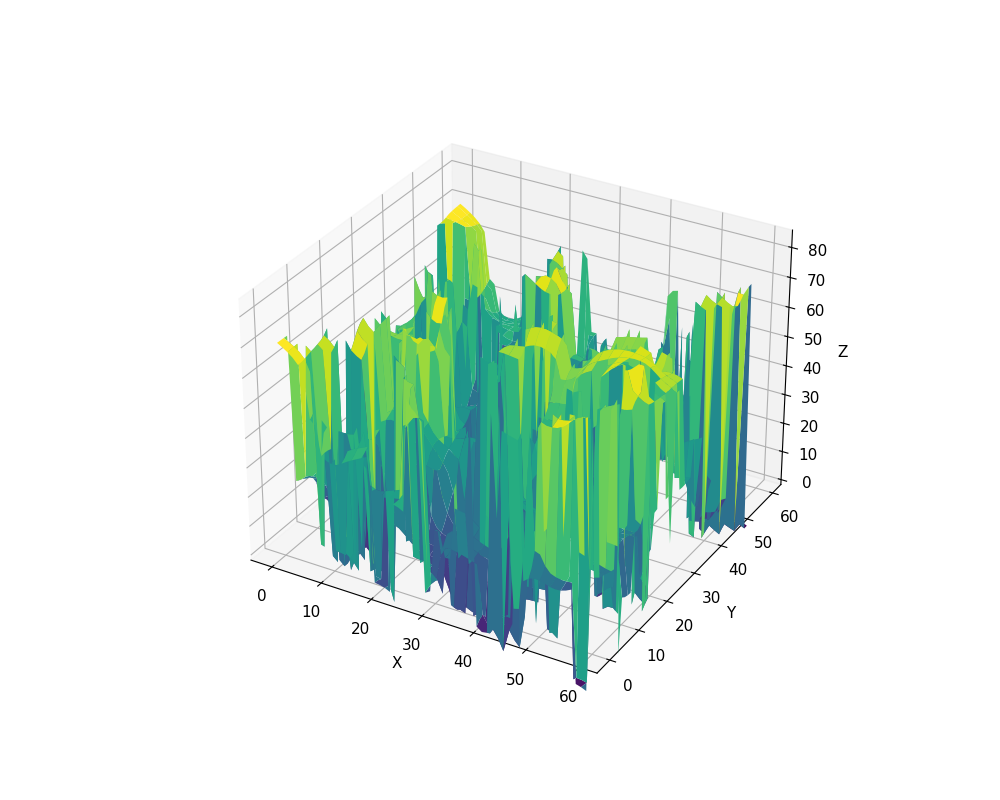

In [5]:
%matplotlib widget
smearing_level = "60"
print(smooth_surfaces.keys())
index =   16  # addded thermalization
fourier_surface.surface_in_3d(smooth_surfaces[smearing_level][index])
#print(smooth_surfaces[smearing_level][index]["z"].max()-smooth_surfaces[smearing_level][index]["z"].min())

In [3]:
%matplotlib inline
for smearing_level, surfaces in smooth_surfaces.items():
    number_of_frames = 1000
    therm = 1000
    file_name = "-".join(folder.split("/")[-2:])
    fourier_surface.animate_surface_in_3d(surfaces[therm:number_of_frames+therm], volume, output_file=f"../videos/surfaces/{file_name}-smear-{smearing_level}.mp4", fps=10)
